In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import os
import praw
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time
import datetime
from dateutil.parser import parse

In [2]:
file_name = "/Users/acollier/Documents/api_keys.json"
data = json.load(open(file_name))

In [3]:
reddit = praw.Reddit(client_id = data['reddit_api_client_id'],
                     client_secret = data['reddit_api_client_secret'],
                     password = data['reddit_password'],
                     user_agent = data['reddit_user_agent'],
                     username = data['reddit_username'])

In [4]:
print(reddit.user.me())

agraves520


In [5]:
bitcoin_count = reddit.subreddit('bitcoin').subscribers
litecoin_count = reddit.subreddit('litecoin').subscribers
nem_count = reddit.subreddit('nem').subscribers
stellar_count = reddit.subreddit('stellar').subscribers
ripple_count = reddit.subreddit('ripple').subscribers
neo_count = reddit.subreddit('neo').subscribers
ethereum_count = reddit.subreddit('ethereum').subscribers
eos_count = reddit.subreddit('eos').subscribers
bitcoincash_count = reddit.subreddit('bitcoincash').subscribers
cardano_count = reddit.subreddit('cardano').subscribers


In [6]:
subscriber_summary = pd.DataFrame([
    {"Coin": "Bitcoin", "Subscriber Count":bitcoin_count},
    {"Coin": "Litecoin", "Subscriber Count": litecoin_count},
    {"Coin": "NEM", "Subscriber Count": nem_count},
    {"Coin": "Stellar", "Subscriber Count": stellar_count},
    {"Coin": "Ripple", "Subscriber Count": ripple_count},
    {"Coin": "NEO", "Subscriber Count": neo_count},
    {"Coin": "Ethereum", "Subscriber Count": ethereum_count},
    {"Coin": "EOS", "Subscriber Count": eos_count},
    {"Coin": "Bitcoin Cash", "Subscriber Count": bitcoincash_count},
    {"Coin": "Cardano", "Subscriber Count": cardano_count},
    
])
subscriber_summary

,Coin,Subscriber Count
0,Bitcoin,721156
1,Litecoin,184701
2,NEM,15692
3,Stellar,68359
4,Ripple,173260
5,NEO,76126
6,Ethereum,312988
7,EOS,29887
8,Bitcoin Cash,29779
9,Cardano,52326


In [9]:
sns.set_style('darkgrid')

today_date = datetime.datetime.now().strftime('%m/%d/%y')

coin_barplot = sns.barplot(data=subscriber_summary, x="Coin", y="Subscriber Count", alpha=0.9)
#coin_barplot.fig.set_size_inches(8,5)

plt.title("Subreddit Subscriber Counts by Cryptocurrency (" + today_date + ")")
plt.xlabel("Cryptocurrency")
plt.ylabel("Number of Subscribers")
    
for p in coin_barplot.axes.patches:
    coin_barplot.annotate("{:.0f}".format(p.get_height()) , 
                (p.get_x() + p.get_width() / 2., p.get_height()), # Placement
                ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 20),
                textcoords='offset points')


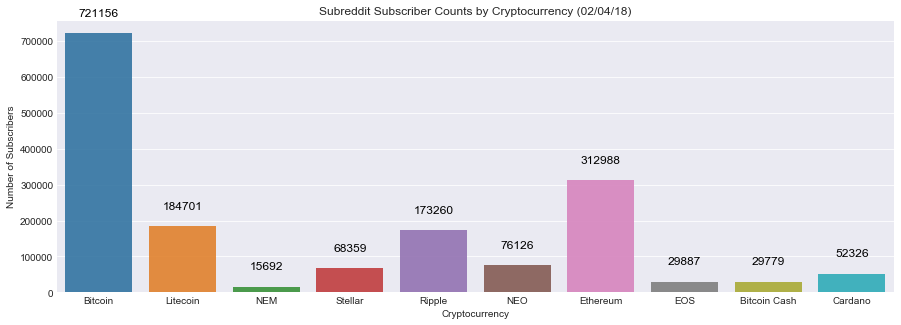

In [10]:
rcParams['figure.figsize'] = 15,5

plt.show()
plt.gcf().clear()